 a dataset of Covid-19 in India from 30 January 2020 to 18 January 2022. The dataset contains information about the daily confirmed cases and deaths. Below are all the columns of the dataset:

1. Date: Contains the date of the record
2. Date_YMD: Contains date in Year-Month-Day Format
3. Daily Confirmed: Contains the daily confirmed cases of Covid-19
4. Daily Deceased: Contains the daily deaths due to Covid-19

You need to use this historical data of covid-19 cases and deaths to predict the number of deaths for the next 30 days

In [1]:
import pandas as pd
df = pd.read_csv("COVID19 data for overall INDIA.csv")
df.head()

,Date,Date_YMD,Daily Confirmed,Daily Deceased
0,30 January 2020,2020-01-30,1,0
1,31 January 2020,2020-01-31,0,0
2,1 February 2020,2020-02-01,0,0
3,2 February 2020,2020-02-02,1,0
4,3 February 2020,2020-02-03,1,0


In [2]:
# look for missing values
df.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Daily Deceased     0
dtype: int64

no missing values

In [3]:
df.dtypes

Date               object
Date_YMD           object
Daily Confirmed     int64
Daily Deceased      int64
dtype: object

In [4]:
df.describe()

,Daily Confirmed,Daily Deceased
count,720.000000,720.000000
mean,52637.915278,675.901389
std,78522.746943,932.895333
min,0.000000,0.000000
25%,10419.250000,159.000000
50%,27383.000000,387.000000
75%,54300.750000,734.750000
max,414280.000000,6139.000000


drop date column

In [5]:

df1 = df.drop("Date", axis= 1)

In [6]:
df1.head()

,Date_YMD,Daily Confirmed,Daily Deceased
0,2020-01-30,1,0
1,2020-01-31,0,0
2,2020-02-01,0,0
3,2020-02-02,1,0
4,2020-02-03,1,0


In [7]:
df1.sample(10)

,Date_YMD,Daily Confirmed,Daily Deceased
304,2020-11-29,39036,444
625,2021-10-16,14078,146
506,2021-06-19,58615,1574
398,2021-03-03,17425,87
85,2020-04-24,1408,59
144,2020-06-22,13560,312
587,2021-09-08,43401,339
453,2021-04-27,362913,3286
500,2021-06-13,71001,3922
259,2020-10-15,63441,882


have a look at trend of daily confirmed cases

In [8]:
import plotly.express as px
fig = px.bar(df1, x= "Date_YMD", y="Daily Confirmed")
fig.show()

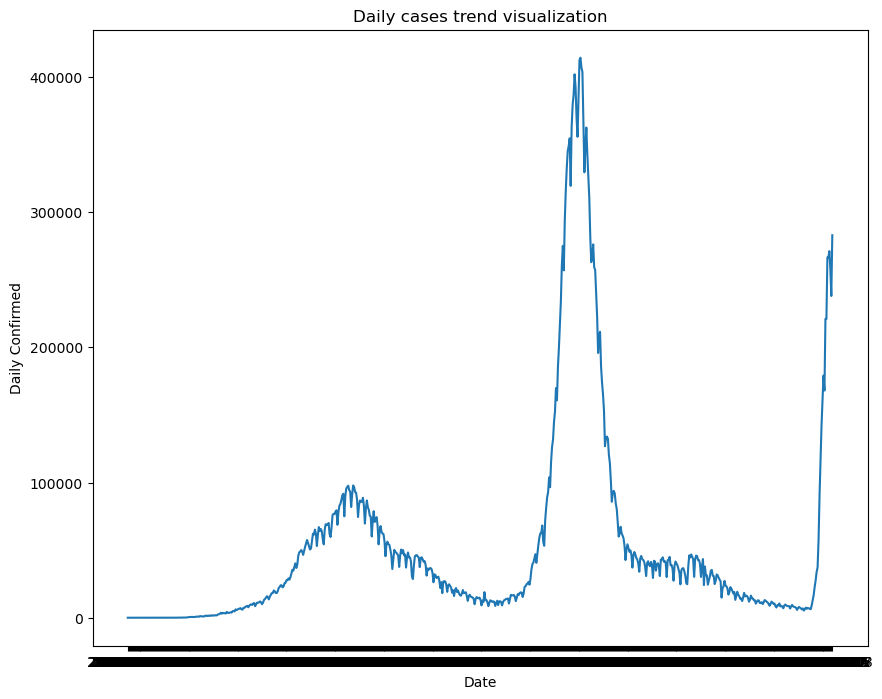

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
plt.xlabel("Date")
plt.ylabel("Daily Confirmed")
plt.title("Daily cases trend visualization")
plt.plot(df1.Date_YMD, df1["Daily Confirmed"])
plt.show()

In [10]:
cases = df1["Daily Confirmed"].sum()
deceased = df1["Daily Deceased"].sum()

labels = ["Confirmed", "Deceased"]
values = [cases, deceased]

fig = px.pie(df1, values=values, 
             names=labels, 
             title='Daily Confirmed Cases vs Daily Deaths', hole=0.5)
fig.show()

calculating the death rate

In [11]:
dr = (df1["Daily Deceased"].sum() / df1["Daily Confirmed"].sum())*100
dr

1.2840580507834722

having a look at deaths trends

In [12]:

fig = px.bar(df1, x= "Date_YMD", y="Daily Deceased")
fig.show()

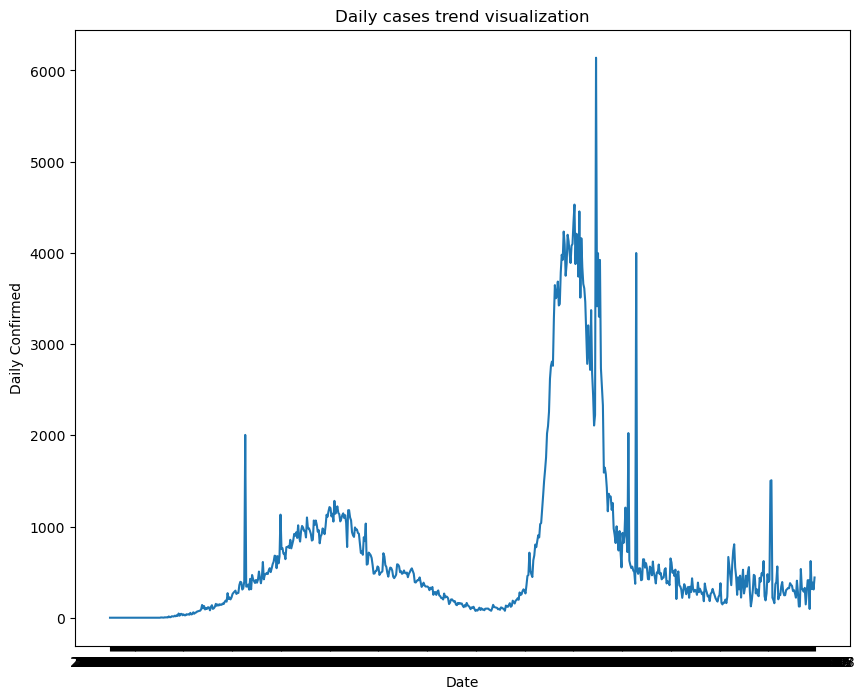

In [13]:
plt.xlabel("Date")
plt.ylabel("Daily Confirmed")
plt.title("Daily cases trend visualization")
plt.plot(df1.Date_YMD, df1["Daily Deceased"])
plt.show()

build a prediction model.

a time series analysis hence use auto ts

In [14]:
df1.head()

,Date_YMD,Daily Confirmed,Daily Deceased
0,2020-01-30,1,0
1,2020-01-31,0,0
2,2020-02-01,0,0
3,2020-02-02,1,0
4,2020-02-03,1,0


In [15]:

from autots import AutoTS
model = AutoTS(forecast_length= 30, frequency= "infer", ensemble= "simple")
ts = model.fit(df1, date_col= "Date_YMD", value_col= "Daily Deceased", id_col= None)
prediction = ts.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model AverageValueNaive in generation 0 of 10
Model Number: 6 with model AverageValueNaive in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Model Number: 8 with model DatepartRegression in generation 0 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 9 with model DatepartRegression in generation 0 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 10 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 10: DatepartRegression
Model Number: 11 with model ETS in generation 0 of 10
Model Number: 12 with model ETS in generation 0 of 10
Model Number: 13 with model GLM in generation 0 of 10
Model Number: 14 with model GLM in generation 0 of 10
Model Number: 15 with model GLS in generation 0 of 10
Model Number: 16 with model GLS in generation 0 of 10
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 17: GluonTS
Model Number: 18 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 18: GluonTS
Model Number: 19 with model GluonTS in generation 0 of 10
Template Eval Error: Impor

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 38 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 38: FBProphet
Model Number: 39 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 39: GluonTS
Model Number: 40 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 41 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 41: MultivariateRegression
Model Number: 42 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 42: DatepartRegression
Model Number: 43 with model SeasonalNaive in generation 0 of 10
Model Number: 44 with model DatepartRegression in generation 0 of 10
Model Number: 45 with model UnobservedComponents in generation 0 of 10
Model Number: 46 with model UnobservedComponents in generation 0 of 10
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 48: VECM
Model Number: 49 with model ARDL in generation 0 of 10
Model Number: 50 with model MultivariateMotif in generation 0 of 10
Model Number: 51 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 60 with model NVAR in generation 0 of 10
Model Number: 61 with model Theta in generation 0 of 10
Model Number: 62 with model UnivariateRegression in generation 0 of 10
Model Number: 63 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 63: ARCH
Model Number: 64 with model ConstantNaive in generation 0 of 10
Model Number: 65 with model LastValueNaive in generation 0 of 10
Model Number: 66 with model AverageValueNaive in generation 0 of 10
Model Number: 67 with model GLS in generation 0 of 10
Model Number: 68 with model SeasonalNaive in generation 0 of 10
Model Number: 69 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 69: GLM
Model Number: 70 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Daily Deceased 

c:\Users\Administrator\anaconda3\lib\site-packages\autots\tools\anomaly_utils.py:1060: FutureWarning:

Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 91 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 91: DatepartRegression
Model Number: 92 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 92: VAR
Model Number: 93 with model UnivariateMotif in generation 0 of 10
Model Number: 94 with model UnivariateRegression in generation 0 of 10
Model Number: 95 with model AverageValueNaive in generation 0 of 10
Model Number: 96 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 96: VAR
Model Number: 97 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 97: DatepartRegression
Model Number: 98 with model MetricMotif in generation 0 of 10
Model Number: 99 with model VAR in generation 0

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning:

invalid value encountered in log



Model Number: 122 with model ETS in generation 0 of 10
Model Number: 123 with model Theta in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model GLM in generation 0 of 10
Model Number: 127 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 127: ARIMA
Model Number: 128 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 128: VAR
Model Number: 129 with model Theta in generation 0 of 10
Model Number: 130 with model SeasonalNaive in generation 0 of 10
Model Number: 131 with model SeasonalNaive in generation 0 of 10
Model Number: 132 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 132: ARCH
Model Number: 133 with model VECM in generation 0 

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 180 with model UnobservedComponents in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model LastValueNaive in generation 0 of 10
Model Number: 183 with model DatepartRegression in generation 0 of 10
Model Number: 184 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 184: ARIMA
Model Number: 185 with model MultivariateRegression in generation 0 of 10
Model Number: 186 with model AverageValueNaive in generation 0 of 10
Model Number: 187 with model ETS in generation 0 of 10
Model Number: 188 with model ETS in generation 0 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Daily Deceased with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
New Generation:

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Model Number: 219 with model UnivariateMotif in generation 1 of 10
Model Number: 220 with model NVAR in generation 1 of 10
Model Number: 221 with model MetricMotif in generation 1 of 10
Model Number: 222 with model GLS in generation 1 of 10
Model Number: 223 with model Theta in generation 1 of 10
Model Number: 224 with model NVAR in generation 1 of 10
Model Number: 225 with model GLS in generation 1 of 10
Model Number: 226 with model MetricMotif in generation 1 of 10
Model Number: 227 with model MultivariateMotif in generation 1 of 10
Model Number: 228 with model LastValueNaive in generation 1 of 10
Model Number: 229 with model MetricMotif in generation 1 of 10
Model Number: 230 with model ConstantNaive in generation 1 of 10
Model Number: 231 with model AverageValueNaive in generation 1 of 10
Model Number: 232 with model UnobservedComponents in generation 1 of 10
Model Number: 233 with model UnivariateMotif in generation 1 of 10
Model Number: 234 with model LastValueNaive in generation

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 253 with model MultivariateMotif in generation 1 of 10
Model Number: 254 with model UnivariateMotif in generation 1 of 10
Model Number: 255 with model ETS in generation 1 of 10
Model Number: 256 with model MetricMotif in generation 1 of 10
Model Number: 257 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Daily Deceased with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 258 with model AverageValueNaive in generation 1 of 10
Model Number: 259 with model MultivariateMotif in generation 1 of 10
Model Number: 260 with model ConstantNaive in generation 1 of 10
Model Number: 261 with model UnivariateMotif in generation 1 of 10
Model Number: 262 with model SeasonalNaive in generation 1 of 10
Model Number: 263 with model MetricMotif in generation 1 of 10
Model Number: 264 with model MetricMotif in gen

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.



Model Number: 289 with model SectionalMotif in generation 1 of 10
Model Number: 290 with model ETS in generation 1 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Daily Deceased with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 291 with model GLM in generation 1 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 292 with model NVAR in generation 1 of 10
Model Number: 293 with model GLM in generation 1 of 10
Model Number: 294 with model ETS in generation 1 of 10
Model Number: 295 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 295: AverageValueNaive
Model Number: 296 with model Theta in generation 1 of 10
Model Number: 297 with model LastValueNaive in generation 1 of 10
Model Number: 298 with model MetricMotif in generation 1 of 10
Model Number: 299 with model UnivariateMotif in generation 1 of 10
Model Number: 300 with model Theta in generation 1 of 10
Model Number: 301 with model MultivariateMotif in generation 1 of 10
Model Number: 302 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 302: GLM
Model Number: 303 with model ARDL in generation 1 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

overflow encountered in square

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:318: RuntimeWarning:

divide by zero encountered in power

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:740: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning:

invalid value encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Administrator\anaconda3\lib\site-pa

Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 303: ARDL
Model Number: 304 with model DatepartRegression in generation 1 of 10
Model Number: 305 with model AverageValueNaive in generation 1 of 10
Model Number: 306 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 306: GLM
Model Number: 307 with model Theta in generation 1 of 10
Model Number: 308 with model MultivariateRegression in generation 1 of 10
Model Number: 309 with model MetricMotif in generation 1 of 10
Model Number: 310 with model SectionalMotif in generation 1 of 10
Model Number: 311 with model UnivariateMotif in generation 1 of 10
Model Number: 312 with model ETS in generation 1 of 10
Model Number: 313 with model ARDL in generation 1 of 10
New Generation: 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10
Model Number: 315 with model Theta in generation 2 of 10
Model

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 373 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 373: UnobservedComponents
Model Number: 374 with model UnivariateMotif in generation 2 of 10
Model Number: 375 with model WindowRegression in generation 2 of 10
Model Number: 376 with model UnivariateMotif in generation 2 of 10
Model Number: 377 with model MultivariateMotif in generation 2 of 10
Model Number: 378 with model AverageValueNaive in generation 2 of 10
Model Number: 379 with model SectionalMotif in generation 2 of 10
Model Number: 380 with model UnivariateMotif in generation 2 of 10
Model Number: 381 with model ARIMA in generation 2 of 10
Model Number: 382 with model NVAR in generation 2 of 10
Model Number: 383 with model ARDL in generation 2 of 10
Model Number: 384 with model Theta in generation 2 of 10
Model Number: 385 with model NVAR in generation 2 of 10
Model Number: 386 with model ARIMA in generatio

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 388 with model ConstantNaive in generation 2 of 10
Model Number: 389 with model ARDL in generation 2 of 10
Model Number: 390 with model GLM in generation 2 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 391 with model UnivariateMotif in generation 2 of 10
Model Number: 392 with model UnobservedComponents in generation 2 of 10
Model Number: 393 with model MultivariateMotif in generation 2 of 10
Model Number: 394 with model LastValueNaive in generation 2 of 10
Model Number: 395 with model AverageValueNaive in generation 2 of 10
Model Number: 396 with model GLS in generation 2 of 10
Model Number: 397 with model UnivariateMotif in generation 2 of 10
Model Number: 398 with model MetricMotif in generation 2 of 10
Model Number: 399 with model UnivariateMotif in generation 2 of 10
Model Number: 400 with model UnobservedComponents in generation 2 of 10
Model Number: 401 with model MetricMotif in generation 2 of 10
Model Number: 402 with model ARDL in generation 2 of 10
Model Number: 403 with model SectionalMotif in generation 2 of 10
Model Number: 404 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regres

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.



Model Number: 435 with model MetricMotif in generation 2 of 10
Model Number: 436 with model MultivariateRegression in generation 2 of 10
Model Number: 437 with model MetricMotif in generation 2 of 10
Model Number: 438 with model MultivariateMotif in generation 2 of 10
New Generation: 3 of 10
Model Number: 439 with model MultivariateMotif in generation 3 of 10
Model Number: 440 with model AverageValueNaive in generation 3 of 10
Model Number: 441 with model MetricMotif in generation 3 of 10
Model Number: 442 with model ARIMA in generation 3 of 10
Model Number: 443 with model NVAR in generation 3 of 10
Model Number: 444 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 444: ConstantNaive
Model Number: 445 with model LastValueNaive in generation 3 of 10
Model Number: 446 with model ARDL in generation 3 of 10
Model Number: 447 with model DatepartRegression in generation 3 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 448 with model AverageValueNaive in generation 3 of 10
Model Number: 449 with model UnobservedComponents in generation 3 of 10
Model Number: 450 with model UnivariateMotif in generation 3 of 10
Model Number: 451 with model ARDL in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 451: ARDL
Model Number: 452 with model SeasonalNaive in generation 3 of 10
Model Number: 453 with model LastValueNaive in generation 3 of 10
Model Number: 454 with model UnivariateMotif in generation 3 of 10
Model Number: 455 with model UnobservedComponents in generation 3 of 10
Model Number: 456 with model UnivariateMotif in generation 3 of 10
Model Number: 457 with model MetricMotif in generation 3 of 10
Model Number: 458 with model ETS in generation 3 of 10
Model Number: 459 with model MultivariateMotif in generation 3 of 10
Model Number: 460 with model MetricMotif in generation 3 of 10
Model Number: 461 with model SeasonalN

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 477 with model NVAR in generation 3 of 10
Model Number: 478 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 478: LastValueNaive
Model Number: 479 with model MultivariateMotif in generation 3 of 10
Model Number: 480 with model ETS in generation 3 of 10
Model Number: 481 with model LastValueNaive in generation 3 of 10
Model Number: 482 with model Theta in generation 3 of 10
Model Number: 483 with model LastValueNaive in generation 3 of 10
Model Number: 484 with model LastValueNaive in generation 3 of 10
Model Number: 485 with model UnivariateMotif in generation 3 of 10
Model Number: 486 with model MetricMotif in generation 3 of 10
Model Number: 487 with model GLM in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 487: GLM
Model Number: 488 with model Theta in generation 3 of 10
Model Number: 489 with model SeasonalNaive in generation 3 of 10
Model Num

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 491 with model ConstantNaive in generation 3 of 10
Model Number: 492 with model MetricMotif in generation 3 of 10
Model Number: 493 with model MetricMotif in generation 3 of 10
Model Number: 494 with model ARIMA in generation 3 of 10
Model Number: 495 with model MultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 495: MultivariateMotif
Model Number: 496 with model MultivariateMotif in generation 3 of 10
Model Number: 497 with model ARIMA in generation 3 of 10
Model Number: 498 with model UnivariateMotif in generation 3 of 10
Model Number: 499 with model UnivariateRegression in generation 3 of 10
Model Number: 500 with model ARIMA in generation 3 of 10
Model Number: 501 with model NVAR in generation 3 of 10
Model Number: 502 with model Theta in generation 3 of 10
Model Number: 503 with model ETS in generation 3 of 10
Model Number: 504 with model MultivariateRegression in generation 3 of 10
Template Eval Error: E

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+08, tolerance: 6.215e+04



Model Number: 523 with model LastValueNaive in generation 3 of 10
Model Number: 524 with model MultivariateMotif in generation 3 of 10
Model Number: 525 with model ARDL in generation 3 of 10
Model Number: 526 with model ConstantNaive in generation 3 of 10
Model Number: 527 with model UnivariateMotif in generation 3 of 10
Model Number: 528 with model ARIMA in generation 3 of 10
Model Number: 529 with model AverageValueNaive in generation 3 of 10
Model Number: 530 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 530: UnobservedComponents
Model Number: 531 with model GLM in generation 3 of 10
Model Number: 532 with model Theta in generation 3 of 10
Model Number: 533 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 533: NVAR
Model Number: 534 with model MultivariateRegression in generation 3 of 10
Model Number: 535 with model SectionalMotif 

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...




Model Number: 543 with model DatepartRegression in generation 3 of 10
Model Number: 544 with model ARDL in generation 3 of 10
Model Number: 545 with model NVAR in generation 3 of 10
Model Number: 546 with model SeasonalNaive in generation 3 of 10
Model Number: 547 with model AverageValueNaive in generation 3 of 10
Model Number: 548 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 548: MetricMotif
Model Number: 549 with model AverageValueNaive in generation 3 of 10
Model Number: 550 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 550: GLM
Model Number: 551 with model ARDL in generation 3 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 552 with model ConstantNaive in generation 3 of 10
Model Number: 553 with model SectionalMotif in generation 3 of 10
Model Number: 554 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 554: NVAR
Model Number: 555 with model ETS in generation 3 of 10
Model Number: 556 with model WindowRegression in generation 3 of 10
Model Number: 557 with model MultivariateRegression in generation 3 of 10
Model Number: 558 with model GLS in generation 3 of 10
Model Number: 559 with model ConstantNaive in generation 3 of 10
Model Number: 560 with model ConstantNaive in generation 3 of 10
Model Number: 561 with model ETS in generation 3 of 10
Model Number: 562 with model SectionalMotif in generation 3 of 10
Model Number: 563 with model GLM in generation 3 of 10
New Generation: 4 of 10
Model Number: 564 with model AverageValueNaive in generation 4 of 10
Model Number: 565 with model MetricMotif in generation 4 of 10
Model Number: 5

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 654 with model UnivariateMotif in generation 4 of 10
Model Number: 655 with model Theta in generation 4 of 10
Model Number: 656 with model NVAR in generation 4 of 10
Model Number: 657 with model LastValueNaive in generation 4 of 10
Model Number: 658 with model LastValueNaive in generation 4 of 10
Model Number: 659 with model AverageValueNaive in generation 4 of 10
Model Number: 660 with model NVAR in generation 4 of 10
Model Number: 661 with model UnobservedComponents in generation 4 of 10
Model Number: 662 with model UnivariateMotif in generation 4 of 10
Model Number: 663 with model ConstantNaive in generation 4 of 10
Model Number: 664 with model ARIMA in generation 4 of 10
Model Number: 665 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 665: WindowRegression
Model Number: 666 with model MetricMotif in generation 4 of 10
Model Number: 667 with model DatepartRegression in 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 671 with model GLM in generation 4 of 10
Model Number: 672 with model ConstantNaive in generation 4 of 10
Model Number: 673 with model NVAR in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 673: NVAR
Model Number: 674 with model UnivariateMotif in generation 4 of 10
Model Number: 675 with model MetricMotif in generation 4 of 10
Model Number: 676 with model NVAR in generation 4 of 10
Model Number: 677 with model MultivariateMotif in generation 4 of 10
Model Number: 678 with model UnobservedComponents in generation 4 of 10
Model Number: 679 with model AverageValueNaive in generation 4 of 10
Model Number: 680 with model AverageValueNaive in generation 4 of 10
Model Number: 681 with model Theta in generation 4 of 10
Model Number: 682 with model SectionalMotif in generation 4 of 10
Model Number: 683 with model UnobservedComponents in generation 4 of 10
Model Number: 684 with model ConstantNaive in generation 4 of 10
Model Number: 6

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 724 with model MetricMotif in generation 5 of 10
Model Number: 725 with model ARIMA in generation 5 of 10
Model Number: 726 with model Theta in generation 5 of 10
Model Number: 727 with model MultivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 727: MultivariateRegression
Model Number: 728 with model ARIMA in generation 5 of 10
Model Number: 729 with model GLM in generation 5 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 730 with model ConstantNaive in generation 5 of 10
Model Number: 731 with model UnivariateMotif in generation 5 of 10
Model Number: 732 with model ETS in generation 5 of 10
Model Number: 733 with model SectionalMotif in generation 5 of 10
Model Number: 734 with model UnivariateMotif in generation 5 of 10
Model Number: 735 with model AverageValueNaive in generation 5 of 10
Model Number: 736 with model AverageValueNaive in generation 5 of 10
Model Number: 737 with model Theta in generation 5 of 10
Model Number: 738 with model LastValueNaive in generation 5 of 10
Model Number: 739 with model UnivariateMotif in generation 5 of 10
Model Number: 740 with model WindowRegression in generation 5 of 10
Model Number: 741 with model SectionalMotif in generation 5 of 10
Model Number: 742 with model MetricMotif in generation 5 of 10
Model Number: 743 with model ARDL in generation 5 of 10
Model Number: 744 with model UnivariateMotif in generation 5 of 10
Model Number: 745 with model Dat

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 745: DatepartRegression
Model Number: 746 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 747 with model NVAR in generation 5 of 10
Model Number: 748 with model MetricMotif in generation 5 of 10
Model Number: 749 with model NVAR in generation 5 of 10
Model Number: 750 with model LastValueNaive in generation 5 of 10
Model Number: 751 with model Theta in generation 5 of 10
Model Number: 752 with model WindowRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 752: WindowRegression
Model Number: 753 with model SectionalMotif in generation 5 of 10
Model Number: 754 with model ETS in generation 5 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.



Model Number: 755 with model UnivariateMotif in generation 5 of 10
Model Number: 756 with model ETS in generation 5 of 10
Model Number: 757 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 758 with model UnobservedComponents in generation 5 of 10
Model Number: 759 with model UnivariateRegression in generation 5 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...




Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 759: UnivariateRegression
Model Number: 760 with model DatepartRegression in generation 5 of 10
Model Number: 761 with model MultivariateRegression in generation 5 of 10
Model Number: 762 with model SeasonalNaive in generation 5 of 10
Model Number: 763 with model MultivariateMotif in generation 5 of 10
Model Number: 764 with model MultivariateMotif in generation 5 of 10
Model Number: 765 with model NVAR in generation 5 of 10
Model Number: 766 with model ETS in generation 5 of 10
Model Number: 767 with model ETS in generation 5 of 10
Model Number: 768 with model UnobservedComponents in generation 5 of 10
Model Number: 769 with model WindowRegression in generation 5 of 10
Model Number: 770 with model ARDL in generation 5 of 10
Model Number: 771 with model UnivariateMotif in generation 5 of 10
Model Number: 772 with model MetricMotif in generation 5 of 10
Model Number: 773 with model MetricMotif in

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 801 with model UnobservedComponents in generation 6 of 10
Model Number: 802 with model SectionalMotif in generation 6 of 10
Model Number: 803 with model UnobservedComponents in generation 6 of 10
Model Number: 804 with model LastValueNaive in generation 6 of 10
Model Number: 805 with model UnivariateMotif in generation 6 of 10
Model Number: 806 with model Theta in generation 6 of 10
Model Number: 807 with model ARIMA in generation 6 of 10
Model Number: 808 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 808: MetricMotif
Model Number: 809 with model UnivariateMotif in generation 6 of 10
Model Number: 810 with model MetricMotif in generation 6 of 10
Model Number: 811 with model LastValueNaive in generation 6 of 10
Model Number: 812 with model SectionalMotif in generation 6 of 10
Model Number: 813 with model ARIMA in generation 6 of 10
Model Number: 814 with model SeasonalNaive in generation 6 of 10
Model

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 859 with model SectionalMotif in generation 6 of 10


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 860 with model ARIMA in generation 6 of 10
Model Number: 861 with model MetricMotif in generation 6 of 10
Model Number: 862 with model AverageValueNaive in generation 6 of 10
Model Number: 863 with model MultivariateMotif in generation 6 of 10
Model Number: 864 with model AverageValueNaive in generation 6 of 10
Model Number: 865 with model UnobservedComponents in generation 6 of 10
Model Number: 866 with model UnobservedComponents in generation 6 of 10
Model Number: 867 with model UnivariateRegression in generation 6 of 10
Model Number: 868 with model MetricMotif in generation 6 of 10
Model Number: 869 with model MultivariateMotif in generation 6 of 10
Model Number: 870 with model ARIMA in generation 6 of 10
Model Number: 871 with model MultivariateMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 871: MultivariateMotif
Model Number: 872 with model MetricMotif in generation 6 of 10
Model Number: 873 with model Average

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 884 with model SectionalMotif in generation 6 of 10
Model Number: 885 with model UnivariateRegression in generation 6 of 10
Model Number: 886 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 886: SectionalMotif
Model Number: 887 with model MultivariateMotif in generation 6 of 10
Model Number: 888 with model UnivariateMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 888: UnivariateMotif
New Generation: 7 of 10
Model Number: 889 with model NVAR in generation 7 of 10
Model Number: 890 with model MultivariateMotif in generation 7 of 10
Model Number: 891 with model MetricMotif in generation 7 of 10
Model Number: 892 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Daily Deceased with ValueError('endog must be strictly positive whe

c:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 896: MultivariateMotif
Model Number: 897 with model UnobservedComponents in generation 7 of 10
Model Number: 898 with model AverageValueNaive in generation 7 of 10
Model Number: 899 with model ETS in generation 7 of 10
Model Number: 900 with model ARDL in generation 7 of 10
Model Number: 901 with model ARDL in generation 7 of 10
Model Number: 902 with model GLM in generation 7 of 10
Model Number: 903 with model SeasonalNaive in generation 7 of 10
Model Number: 904 with model UnivariateRegression in generation 7 of 10
Model Number: 905 with model ARDL in generation 7 of 10
Model Number: 906 with model LastValueNaive in generation 7 of 10
Model Number: 907 with model MetricMotif in generation 7 of 10
Model Number: 908 with model MetricMotif in generation 7 of 10
Model Number: 909 with model ARIMA in generation 7 of 10
Model Number: 910 with model WindowRegres

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 916 with model AverageValueNaive in generation 7 of 10
Model Number: 917 with model ARIMA in generation 7 of 10
Model Number: 918 with model ARIMA in generation 7 of 10
Model Number: 919 with model UnobservedComponents in generation 7 of 10
Model Number: 920 with model GLM in generation 7 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 921 with model ConstantNaive in generation 7 of 10
Model Number: 922 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Daily Deceased with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'AlignLastValue', '1': 'AnomalyRemoval'}, 'transformation_params': {'0': {'rows': 1, 'lag': 2, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False}, '1': {'method': 'zscore', 'transform_dict': {'fillna': 'zero', 'transformations': {'0': 'bkfilter', '1': 'EWMAFilter'}, 'transformation_params': {'0': {}, '1': {'span': 3}}}, 'method_params': {'distribution': 'norm', 'alpha': 0.1}, 'fillna': 'ffill'}}}. fail_on_forecast_nan=True") in model 922: ETS
Model Number: 923 with

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 931 with model UnivariateRegression in generation 7 of 10
Model Number: 932 with model MetricMotif in generation 7 of 10
Model Number: 933 with model UnobservedComponents in generation 7 of 10
Model Number: 934 with model ETS in generation 7 of 10
Model Number: 935 with model MultivariateMotif in generation 7 of 10
Model Number: 936 with model LastValueNaive in generation 7 of 10
Model Number: 937 with model Theta in generation 7 of 10
Model Number: 938 with model UnivariateMotif in generation 7 of 10
Model Number: 939 with model SeasonalNaive in generation 7 of 10
Model Number: 940 with model MetricMotif in generation 7 of 10
Model Number: 941 with model NVAR in generation 7 of 10
Model Number: 942 with model Theta in generation 7 of 10
Model Number: 943 with model ETS in generation 7 of 10
Model Number: 944 with model ARIMA in generation 7 of 10
Model Number: 945 with model LastValueNaive in generation 7 of 10
Model Number: 946 with model GLM in generation 7 of 10
Model

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear]

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear]

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LibLinear]

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 961 with model AverageValueNaive in generation 7 of 10
Model Number: 962 with model MultivariateRegression in generation 7 of 10
Model Number: 963 with model UnivariateMotif in generation 7 of 10
Model Number: 964 with model AverageValueNaive in generation 7 of 10
Model Number: 965 with model Theta in generation 7 of 10
Model Number: 966 with model LastValueNaive in generation 7 of 10
Model Number: 967 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 968 with model AverageValueNaive in generation 7 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'HolidayTransformer', '1': 'MinMaxScaler', '2': 'AlignLastValue', '3': 'SeasonalDifference', '4': 'AlignLastValue'}, 'transformation_params': {'0': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'method_params': {'alpha': 0.05}, 'fillna': 'linear'}, 'remove_excess_anomalies': True, 'impact': 'median_value', 'regression_params': {}}, '1': {}, '2': {'rows': 7, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'fi

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Template Eval Error: ValueError('X has 36 features, but RandomForestRegressor is expecting 46 features as input.') in model 972: MultivariateRegression
Model Number: 973 with model MultivariateRegression in generation 7 of 10
Model Number: 974 with model NVAR in generation 7 of 10
Model Number: 975 with model MetricMotif in generation 7 of 10
Model Number: 976 with model MetricMotif in generation 7 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.



Model Number: 977 with model UnivariateMotif in generation 7 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'CenterLastValue', '1': 'CenterLastValue', '2': 'PowerTransformer', '3': 'SeasonalDifference', '4': 'AlignLastValue', '5': 'CumSumTransformer'}, 'transformation_params': {'0': {'rows': 2}, '1': {'rows': 1}, '2': {}, '3': {'lag_1': 7, 'method': 'Median'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '5': {}}}. fail_on_forecast_nan=True") in model 977: UnivariateMotif
Model Number: 978 with model UnivariateMotif in generation 7 of 10
Model Number: 979 with model AverageValueNaive in generation 7 of 10
Model Number: 980 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 981 with model MetricMotif in generation 7 of 10
Model Number: 982 with model AverageValueNaive in generation 7 of 10
Model Number: 983 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 983: UnivariateMotif
Model Number: 984 with model UnobservedComponents in generation 7 of 10
Model Number: 985 with model MetricMotif in generation 7 of 10
Model Number: 986 with model MetricMotif in generation 7 of 10
Model Number: 987 with model LastValueNaive in generation 7 of 10
Model Number: 988 with model SectionalMotif in generation 7 of 10
New Generation: 8 of 10
Model Number: 989 with model ConstantNaive in generation 8 of 10
Model Number: 990 with model GLM in generation 8 of 10
Model Number: 991 with model WindowRegression in generation 8 of 10
Model Number: 992 with model ARIMA in generation 8 of 10
Model Number: 993 with model Theta in generation 8 of 10
Model Number: 994 with model MultivariateMotif 

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.

c:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

c:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1028: ARDL
Model Number: 1029 with model GLM in generation 8 of 10
Model Number: 1030 with model MultivariateMotif in generation 8 of 10
Model Number: 1031 with model UnivariateMotif in generation 8 of 10
Model Number: 1032 with model MultivariateRegression in generation 8 of 10
Model Number: 1033 with model AverageValueNaive in generation 8 of 10
Model Number: 1034 with model MultivariateMotif in generation 8 of 10
Model Number: 1035 with model ARIMA in generation 8 of 10
Model Number: 1036 with model UnobservedComponents in generation 8 of 10
Model Number: 1037 with model SectionalMotif in generation 8 of 10
Model Number: 1038 with model MetricMotif in generation 8 of 10
Model Number: 1039 with model UnivariateMotif in generation 8 of 10
Model Number: 1040 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_reg

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54701e-25): result may not be accurate.



Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 1058: ARIMA
Model Number: 1059 with model LastValueNaive in generation 8 of 10
Model Number: 1060 with model NVAR in generation 8 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- seasonalitycommonfourier_26
- seasonalitycommonfourier_27
- seasonalitycommonfourier_28
- seasonalitycommonfourier_29
- seasonalitycommonfourier_30
- ...




Model Number: 1061 with model ARIMA in generation 8 of 10
Model Number: 1062 with model UnivariateMotif in generation 8 of 10
Model Number: 1063 with model UnivariateMotif in generation 8 of 10
Model Number: 1064 with model ConstantNaive in generation 8 of 10
Model Number: 1065 with model LastValueNaive in generation 8 of 10
Model Number: 1066 with model UnivariateMotif in generation 8 of 10
Model Number: 1067 with model SectionalMotif in generation 8 of 10
Model Number: 1068 with model SectionalMotif in generation 8 of 10
Model Number: 1069 with model ETS in generation 8 of 10
Model Number: 1070 with model NVAR in generation 8 of 10
Model Number: 1071 with model AverageValueNaive in generation 8 of 10
Model Number: 1072 with model ETS in generation 8 of 10
Model Number: 1073 with model ARDL in generation 8 of 10
Model Number: 1074 with model MultivariateMotif in generation 8 of 10
Model Number: 1075 with model GLS in generation 8 of 10
Model Number: 1076 with model LastValueNaive in g

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 1117 with model SectionalMotif in generation 9 of 10


[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1118 with model NVAR in generation 9 of 10
Model Number: 1119 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 1119: NVAR
Model Number: 1120 with model UnivariateRegression in generation 9 of 10
Model Number: 1121 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1121: MultivariateRegression
Model Number: 1122 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1122: GLM
Model Number: 1123 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1123: AverageValueNaive
Model Number: 1124 with model UnobservedComponents in generation 9 of 10


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 1125 with model UnobservedComponents in generation 9 of 10
Model Number: 1126 with model AverageValueNaive in generation 9 of 10
Model Number: 1127 with model MultivariateMotif in generation 9 of 10
Model Number: 1128 with model UnivariateMotif in generation 9 of 10
Model Number: 1129 with model MultivariateMotif in generation 9 of 10
Model Number: 1130 with model ARDL in generation 9 of 10
Model Number: 1131 with model MultivariateMotif in generation 9 of 10
Model Number: 1132 with model UnivariateMotif in generation 9 of 10
Model Number: 1133 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

Model Number: 1134 with model MultivariateMotif in generation 9 of 10
Model Number: 1135 with model SeasonalNaive in generation 9 of 10
Model Number: 1136 with model MultivariateMotif in generation 9 of 10
Model Number: 1137 with model UnivariateMotif in generation 9 of 10
Model Number: 1138 with model MetricMotif in generation 9 of 10
Model Number: 1139 with model UnivariateRegression in generation 9 of 10
Model Number: 1140 with model WindowRegression in generation 9 of 10
Model Number: 1141 with model SectionalMotif in generation 9 of 10
Model Number: 1142 with model SectionalMotif in generation 9 of 10
Model Number: 1143 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1143: ARDL
Model Number: 1144 with model UnivariateMotif in generation 9 of 10
Model Number: 1145 with model SectionalMotif in generation 9 of 10
Model Number: 1146 with model MetricMotif in generation 9 of 10
Model Number: 1147

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Model Number: 1214 with model UnivariateMotif in generation 10 of 10
Model Number: 1215 with model MultivariateRegression in generation 10 of 10
Model Number: 1216 with model SectionalMotif in generation 10 of 10
Model Number: 1217 with model AverageValueNaive in generation 10 of 10
Model Number: 1218 with model AverageValueNaive in generation 10 of 10
Model Number: 1219 with model UnivariateMotif in generation 10 of 10
Model Number: 1220 with model SectionalMotif in generation 10 of 10
Model Number: 1221 with model MultivariateRegression in generation 10 of 10
Model Number: 1222 with model AverageValueNaive in generation 10 of 10
Model Number: 1223 with model UnobservedComponents in generation 10 of 10
Model Number: 1224 with model AverageValueNaive in generation 10 of 10
Model Number: 1225 with model MultivariateMotif in generation 10 of 10
Model Number: 1226 with model ConstantNaive in generation 10 of 10
Model Number: 1227 with model MultivariateRegression in generation 10 of 10
Mo

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

54 - MultivariateRegression with avg smape 37.44: 
Model Number: 55 of 188 with model MultivariateRegression for Validation 1
55 - MultivariateRegression with avg smape 37.52: 
Model Number: 56 of 188 with model UnivariateMotif for Validation 1
56 - UnivariateMotif with avg smape 74.93: 
Model Number: 57 of 188 with model MultivariateMotif for Validation 1
57 - MultivariateMotif with avg smape 35.16: 
Model Number: 58 of 188 with model Theta for Validation 1
58 - Theta with avg smape 38.45: 
Model Number: 59 of 188 with model UnivariateMotif for Validation 1
59 - UnivariateMotif with avg smape 41.77: 
Model Number: 60 of 188 with model SectionalMotif for Validation 1
60 - SectionalMotif with avg smape 35.69: 
Model Number: 61 of 188 with model ARDL for Validation 1
61 - ARDL with avg smape 38.67: 
Model Number: 62 of 188 with model ARDL for Validation 1
62 - ARDL with avg smape 38.71: 
Model Number: 63 of 188 with model SectionalMotif for Validation 1
63 - SectionalMotif with avg smape

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

85 - MultivariateRegression with avg smape 42.36: 
Model Number: 86 of 188 with model ARDL for Validation 1
86 - ARDL with avg smape 37.74: 
Model Number: 87 of 188 with model Theta for Validation 1
87 - Theta with avg smape 38.03: 
Model Number: 88 of 188 with model UnobservedComponents for Validation 1
88 - UnobservedComponents with avg smape 32.72: 
Model Number: 89 of 188 with model UnobservedComponents for Validation 1
89 - UnobservedComponents with avg smape 42.13: 
Model Number: 90 of 188 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

90 - MultivariateRegression with avg smape 37.98: 
Model Number: 91 of 188 with model MultivariateRegression for Validation 1
91 - MultivariateRegression with avg smape 81.74: 
Model Number: 92 of 188 with model ARDL for Validation 1
92 - ARDL with avg smape 35.81: 
Model Number: 93 of 188 with model ARDL for Validation 1
93 - ARDL with avg smape 35.81: 
Model Number: 94 of 188 with model ETS for Validation 1
94 - ETS with avg smape 32.88: 
Model Number: 95 of 188 with model Theta for Validation 1
95 - Theta with avg smape 38.79: 
Model Number: 96 of 188 with model ETS for Validation 1
96 - ETS with avg smape 32.88: 
Model Number: 97 of 188 with model Theta for Validation 1
97 - Theta with avg smape 38.85: 
Model Number: 98 of 188 with model ARDL for Validation 1
98 - ARDL with avg smape 39.33: 
Model Number: 99 of 188 with model ARDL for Validation 1
99 - ARDL with avg smape 39.33: 
Model Number: 100 of 188 with model Theta for Validation 1
100 - Theta with avg smape 35.39: 
Model Num

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



109 - GLM with avg smape 36.26: 
Model Number: 110 of 188 with model ETS for Validation 1
110 - ETS with avg smape 37.02: 
Model Number: 111 of 188 with model NVAR for Validation 1
111 - NVAR with avg smape 45.74: 
Model Number: 112 of 188 with model ETS for Validation 1
112 - ETS with avg smape 37.33: 
Model Number: 113 of 188 with model NVAR for Validation 1
113 - NVAR with avg smape 36.72: 
Model Number: 114 of 188 with model NVAR for Validation 1
114 - NVAR with avg smape 36.72: 
Model Number: 115 of 188 with model UnobservedComponents for Validation 1
115 - UnobservedComponents with avg smape 40.83: 
Model Number: 116 of 188 with model ARDL for Validation 1
116 - ARDL with avg smape 38.03: 
Model Number: 117 of 188 with model NVAR for Validation 1
117 - NVAR with avg smape 36.52: 
Model Number: 118 of 188 with model NVAR for Validation 1
118 - NVAR with avg smape 55.62: 
Model Number: 119 of 188 with model NVAR for Validation 1
119 - NVAR with avg smape 36.95: 
Model Number: 120 o

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



154 - DatepartRegression with avg smape 57.22: 
Model Number: 155 of 188 with model WindowRegression for Validation 1
155 - WindowRegression with avg smape 53.25: 
Model Number: 156 of 188 with model UnivariateRegression for Validation 1
156 - UnivariateRegression with avg smape 36.85: 
Model Number: 157 of 188 with model GLM for Validation 1


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



157 - GLM with avg smape 62.49: 
Model Number: 158 of 188 with model GLM for Validation 1
158 - GLM with avg smape 38.85: 
Model Number: 159 of 188 with model GLM for Validation 1
159 - GLM with avg smape 38.24: 
Model Number: 160 of 188 with model GLM for Validation 1


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 160: GLM
Model Number: 161 of 188 with model GLM for Validation 1
161 - GLM with avg smape 37.67: 
Model Number: 162 of 188 with model GLM for Validation 1
162 - GLM with avg smape 40.17: 
Model Number: 163 of 188 with model GLM for Validation 1
163 - GLM with avg smape 53.84: 
Model Number: 164 of 188 with model GLM for Validation 1
164 - GLM with avg smape 46.98: 
Model Number: 165 of 188 with model UnivariateRegression for Validation 1
165 - UnivariateRegression with avg smape 37.83: 
Model Number: 166 of 188 with model UnivariateRegression for Validation 1
166 - UnivariateRegression with avg smape 47.4: 
Model Number: 167 of 188 with model UnivariateRegression for Validation 1
167 - UnivariateRegression with avg smape 45.88: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 1
168 - UnivariateRegression with avg smape 80.99: 
Model Number: 169 of 1

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

54 - MultivariateRegression with avg smape 72.93: 
Model Number: 55 of 188 with model MultivariateRegression for Validation 2
55 - MultivariateRegression with avg smape 45.71: 
Model Number: 56 of 188 with model UnivariateMotif for Validation 2
56 - UnivariateMotif with avg smape 97.45: 
Model Number: 57 of 188 with model MultivariateMotif for Validation 2
57 - MultivariateMotif with avg smape 45.94: 
Model Number: 58 of 188 with model Theta for Validation 2
58 - Theta with avg smape 66.15: 
Model Number: 59 of 188 with model UnivariateMotif for Validation 2
59 - UnivariateMotif with avg smape 97.34: 
Model Number: 60 of 188 with model SectionalMotif for Validation 2
60 - SectionalMotif with avg smape 79.18: 
Model Number: 61 of 188 with model ARDL for Validation 2
61 - ARDL with avg smape 65.78: 
Model Number: 62 of 188 with model ARDL for Validation 2
62 - ARDL with avg smape 65.85: 
Model Number: 63 of 188 with model SectionalMotif for Validation 2
63 - SectionalMotif with avg smape

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

85 - MultivariateRegression with avg smape 106.14: 
Model Number: 86 of 188 with model ARDL for Validation 2
86 - ARDL with avg smape 84.13: 
Model Number: 87 of 188 with model Theta for Validation 2
87 - Theta with avg smape 33.48: 
Model Number: 88 of 188 with model UnobservedComponents for Validation 2
88 - UnobservedComponents with avg smape 175.43: 
Model Number: 89 of 188 with model UnobservedComponents for Validation 2
89 - UnobservedComponents with avg smape 33.29: 
Model Number: 90 of 188 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

90 - MultivariateRegression with avg smape 45.58: 
Model Number: 91 of 188 with model MultivariateRegression for Validation 2
91 - MultivariateRegression with avg smape 62.27: 
Model Number: 92 of 188 with model ARDL for Validation 2
92 - ARDL with avg smape 71.27: 
Model Number: 93 of 188 with model ARDL for Validation 2
93 - ARDL with avg smape 71.27: 
Model Number: 94 of 188 with model ETS for Validation 2
94 - ETS with avg smape 94.25: 
Model Number: 95 of 188 with model Theta for Validation 2
95 - Theta with avg smape 48.59: 
Model Number: 96 of 188 with model ETS for Validation 2
96 - ETS with avg smape 94.25: 
Model Number: 97 of 188 with model Theta for Validation 2
97 - Theta with avg smape 48.42: 
Model Number: 98 of 188 with model ARDL for Validation 2
98 - ARDL with avg smape 40.6: 
Model Number: 99 of 188 with model ARDL for Validation 2
99 - ARDL with avg smape 40.6: 
Model Number: 100 of 188 with model Theta for Validation 2
100 - Theta with avg smape 74.76: 
Model Numbe

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



109 - GLM with avg smape 94.94: 
Model Number: 110 of 188 with model ETS for Validation 2
110 - ETS with avg smape 144.29: 
Model Number: 111 of 188 with model NVAR for Validation 2
111 - NVAR with avg smape 77.45: 
Model Number: 112 of 188 with model ETS for Validation 2
112 - ETS with avg smape 75.33: 
Model Number: 113 of 188 with model NVAR for Validation 2
113 - NVAR with avg smape 64.08: 
Model Number: 114 of 188 with model NVAR for Validation 2
114 - NVAR with avg smape 64.08: 
Model Number: 115 of 188 with model UnobservedComponents for Validation 2
115 - UnobservedComponents with avg smape 74.33: 
Model Number: 116 of 188 with model ARDL for Validation 2
116 - ARDL with avg smape 64.65: 
Model Number: 117 of 188 with model NVAR for Validation 2
117 - NVAR with avg smape 62.79: 
Model Number: 118 of 188 with model NVAR for Validation 2
118 - NVAR with avg smape 49.69: 
Model Number: 119 of 188 with model NVAR for Validation 2
119 - NVAR with avg smape 40.11: 
Model Number: 120 

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



154 - DatepartRegression with avg smape 36.79: 
Model Number: 155 of 188 with model WindowRegression for Validation 2
155 - WindowRegression with avg smape 56.34: 
Model Number: 156 of 188 with model UnivariateRegression for Validation 2
156 - UnivariateRegression with avg smape 98.13: 
Model Number: 157 of 188 with model GLM for Validation 2


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



157 - GLM with avg smape 151.82: 
Model Number: 158 of 188 with model GLM for Validation 2
158 - GLM with avg smape 51.39: 
Model Number: 159 of 188 with model GLM for Validation 2
159 - GLM with avg smape 34.03: 
Model Number: 160 of 188 with model GLM for Validation 2


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 160: GLM
Model Number: 161 of 188 with model GLM for Validation 2
161 - GLM with avg smape 33.78: 
Model Number: 162 of 188 with model GLM for Validation 2
162 - GLM with avg smape 88.03: 
Model Number: 163 of 188 with model GLM for Validation 2
163 - GLM with avg smape 63.43: 
Model Number: 164 of 188 with model GLM for Validation 2
164 - GLM with avg smape 53.58: 
Model Number: 165 of 188 with model UnivariateRegression for Validation 2
165 - UnivariateRegression with avg smape 52.02: 
Model Number: 166 of 188 with model UnivariateRegression for Validation 2
166 - UnivariateRegression with avg smape 43.69: 
Model Number: 167 of 188 with model UnivariateRegression for Validation 2
167 - UnivariateRegression with avg smape 65.59: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 2
168 - UnivariateRegression with avg smape 127.59: 
Model Number: 169 of

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

54 - MultivariateRegression with avg smape 25.3: 
Model Number: 55 of 188 with model MultivariateRegression for Validation 3
55 - MultivariateRegression with avg smape 56.71: 
Model Number: 56 of 188 with model UnivariateMotif for Validation 3
56 - UnivariateMotif with avg smape 35.11: 
Model Number: 57 of 188 with model MultivariateMotif for Validation 3
57 - MultivariateMotif with avg smape 33.23: 
Model Number: 58 of 188 with model Theta for Validation 3
58 - Theta with avg smape 28.42: 
Model Number: 59 of 188 with model UnivariateMotif for Validation 3
59 - UnivariateMotif with avg smape 24.66: 
Model Number: 60 of 188 with model SectionalMotif for Validation 3
60 - SectionalMotif with avg smape 63.17: 
Model Number: 61 of 188 with model ARDL for Validation 3
61 - ARDL with avg smape 29.72: 
Model Number: 62 of 188 with model ARDL for Validation 3
62 - ARDL with avg smape 28.97: 
Model Number: 63 of 188 with model SectionalMotif for Validation 3
63 - SectionalMotif with avg smape 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

85 - MultivariateRegression with avg smape 18.22: 
Model Number: 86 of 188 with model ARDL for Validation 3
86 - ARDL with avg smape 20.46: 
Model Number: 87 of 188 with model Theta for Validation 3
87 - Theta with avg smape 75.29: 
Model Number: 88 of 188 with model UnobservedComponents for Validation 3
88 - UnobservedComponents with avg smape 172.42: 
Model Number: 89 of 188 with model UnobservedComponents for Validation 3
89 - UnobservedComponents with avg smape 86.66: 
Model Number: 90 of 188 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

90 - MultivariateRegression with avg smape 31.94: 
Model Number: 91 of 188 with model MultivariateRegression for Validation 3
91 - MultivariateRegression with avg smape 32.45: 
Model Number: 92 of 188 with model ARDL for Validation 3
92 - ARDL with avg smape 39.84: 
Model Number: 93 of 188 with model ARDL for Validation 3
93 - ARDL with avg smape 39.84: 
Model Number: 94 of 188 with model ETS for Validation 3
94 - ETS with avg smape 33.42: 
Model Number: 95 of 188 with model Theta for Validation 3
95 - Theta with avg smape 44.71: 
Model Number: 96 of 188 with model ETS for Validation 3
96 - ETS with avg smape 33.42: 
Model Number: 97 of 188 with model Theta for Validation 3
97 - Theta with avg smape 45.43: 
Model Number: 98 of 188 with model ARDL for Validation 3
98 - ARDL with avg smape 35.07: 
Model Number: 99 of 188 with model ARDL for Validation 3
99 - ARDL with avg smape 35.07: 
Model Number: 100 of 188 with model Theta for Validation 3
100 - Theta with avg smape 31.53: 
Model Num

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



109 - GLM with avg smape 35.23: 
Model Number: 110 of 188 with model ETS for Validation 3
110 - ETS with avg smape 21.15: 
Model Number: 111 of 188 with model NVAR for Validation 3
111 - NVAR with avg smape 23.06: 
Model Number: 112 of 188 with model ETS for Validation 3
112 - ETS with avg smape 16.69: 
Model Number: 113 of 188 with model NVAR for Validation 3
113 - NVAR with avg smape 39.98: 
Model Number: 114 of 188 with model NVAR for Validation 3
114 - NVAR with avg smape 39.98: 
Model Number: 115 of 188 with model UnobservedComponents for Validation 3
115 - UnobservedComponents with avg smape 34.48: 
Model Number: 116 of 188 with model ARDL for Validation 3
116 - ARDL with avg smape 28.27: 
Model Number: 117 of 188 with model NVAR for Validation 3
117 - NVAR with avg smape 42.89: 
Model Number: 118 of 188 with model NVAR for Validation 3
118 - NVAR with avg smape 41.75: 
Model Number: 119 of 188 with model NVAR for Validation 3
119 - NVAR with avg smape 37.77: 
Model Number: 120 o

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



154 - DatepartRegression with avg smape 111.03: 
Model Number: 155 of 188 with model WindowRegression for Validation 3
155 - WindowRegression with avg smape 81.99: 
Model Number: 156 of 188 with model UnivariateRegression for Validation 3
156 - UnivariateRegression with avg smape 40.19: 
Model Number: 157 of 188 with model GLM for Validation 3


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



157 - GLM with avg smape 48.54: 
Model Number: 158 of 188 with model GLM for Validation 3
158 - GLM with avg smape 27.37: 
Model Number: 159 of 188 with model GLM for Validation 3


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



159 - GLM with avg smape 31.77: 
Model Number: 160 of 188 with model GLM for Validation 3


c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning:

divide by zero encountered in true_divide

c:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 160: GLM
Model Number: 161 of 188 with model GLM for Validation 3
161 - GLM with avg smape 24.47: 
Model Number: 162 of 188 with model GLM for Validation 3
162 - GLM with avg smape 23.51: 
Model Number: 163 of 188 with model GLM for Validation 3
163 - GLM with avg smape 128.41: 
Model Number: 164 of 188 with model GLM for Validation 3
164 - GLM with avg smape 29.36: 
Model Number: 165 of 188 with model UnivariateRegression for Validation 3
165 - UnivariateRegression with avg smape 22.47: 
Model Number: 166 of 188 with model UnivariateRegression for Validation 3
166 - UnivariateRegression with avg smape 16.7: 
Model Number: 167 of 188 with model UnivariateRegression for Validation 3
167 - UnivariateRegression with avg smape 157.45: 
Model Number: 168 of 188 with model UnivariateRegression for Validation 3
168 - UnivariateRegression with avg smape 27.6: 
Model Number: 169 of 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks   

            Daily Deceased
2022-01-19      382.656493
2022-01-20      369.610564
2022-01-21      343.104284
2022-01-22      376.291249
2022-01-23      324.771244
2022-01-24      360.560784
2022-01-25      323.387661
2022-01-26      351.632875
2022-01-27      315.382523
2022-01-28      388.226711
2022-01-29      308.616270
2022-01-30      345.971101
2022-01-31      312.301450
2022-02-01      348.339965
2022-02-02      333.102557
2022-02-03      352.947415
2022-02-04      314.723153
2022-02-05      330.482928
2022-02-06      302.216304
2022-02-07      332.611954
2022-02-08      292.609897
2022-02-09      345.178343
2022-02-10      314.481620
2022-02-11      334.624259
2022-02-12      287.700410
2022-02-13      334.768975
2022-02-14      301.855752
2022-02-15      299.903760
2022-02-16      297.526747
2022-02-17      306.108111


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:    0.0s finished
